<a href="https://colab.research.google.com/github/sujay-dsa/Academic-Projects/blob/master/EVA_S1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import the necessary packages
import numpy as np
from urllib.request import urlopen
import cv2
from matplotlib import pyplot as plt

# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

In [0]:
image = url_to_image("http://www.cs.tut.fi/~foi/GCF-BM3D/images/house.png")

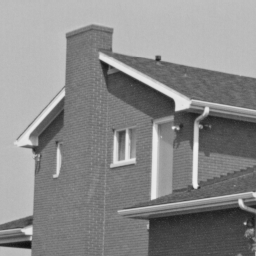

In [21]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [0]:
edges = cv2.Canny(image,100,200)

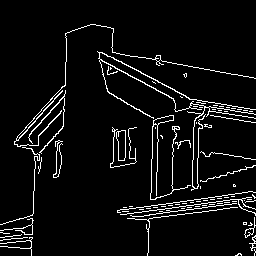

In [23]:
cv2_imshow(edges)

## Vertical Edge Detector

\begin{bmatrix} 
-1 & 0 & 1 \\
-1 & 0 & 1 \\
-1 & 0 & 1 \\
\end{bmatrix}

An edge in an image is a sharp transition in pixel color along a straight line. If the distribution of pixel densities is uniform, the resultant sum of the convolution will be zero thus suppressing all areas where the transitions aren't sharp

In areas where pixel transitions are high, ;the high pixel values and low pixel values are added to each other thus producing a high value band which denotes an edge. The smallest edge this kernel can detect is 3 pixels.

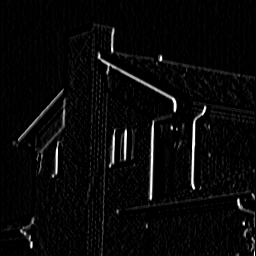

In [24]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[-1,0,1],[-1,0,1],[-1,0,1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

## Horizontal Edge Detector

\begin{bmatrix} 
-1 & -1 & -1 \\
0 & 0 & 0 \\
1 & 1 & 1 \\
\end{bmatrix}


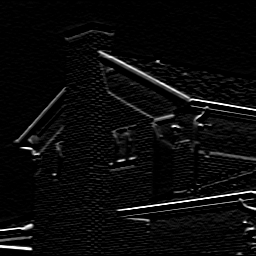

In [25]:
# horizontal edge detector
kernel = np.float32([[-1,-1,-1],[0,0,0],[1,1,1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

## 45 degree Edge Detector

\begin{bmatrix} 
0 & 1 & 2 \\
-1 & 0 & 1 \\
-2 & -1 & 0 \\
\end{bmatrix}

A 45 degree edge is where the pixel transition is high at an angle.
When this kernel is convolved, pixels above a 45 degree edge are amplified. In rest of the cases, it will subdue all pixels. So the edge detector output will be an edge slightly thicker than the original edge. But the edge at 45 will be highlighted. 


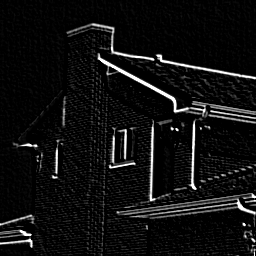

In [26]:
# 45 degree angle detector
kernel = np.float32([[0,1,2],[-1,0,1],[-2,-1,0]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

## Sharpen Kernel

\begin{bmatrix} 
0 & -1 & 0 \\
-1 & 5 & -1 \\
0 & -1 & 0 \\
\end{bmatrix}

Demphasize the surrounding pixels. 

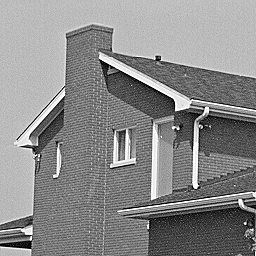

In [31]:
# sharpen kernel
kernel = np.float32([[0,-1,0],[-1,5,-1],[0,-1,0]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

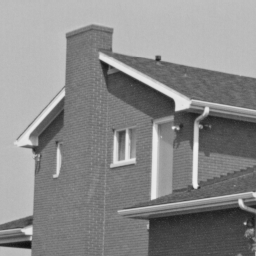

In [32]:
# Identity kernel
kernel = np.float32([[0,0,0],[0,1,0],[0,0,0]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)